### 2026.01.15


### Isolation Forest: 이상치 탐지

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [5]:
# 시드 고정: 재현성을 위해 난수 시드를 고정
np.random.seed(42)

In [6]:
# 정상 트래픽 데이터 생성
# 평균(loc=50), 표준편차(scale=10)를 따르는 정규분포에서 데이터 생성(100개의 샘플, 2차원)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))
print(normal_traffic)

[[54.96714153 48.61735699]
 [56.47688538 65.23029856]
 [47.65846625 47.65863043]
 [65.79212816 57.67434729]
 [45.30525614 55.42560044]
 [45.36582307 45.34270246]
 [52.41962272 30.86719755]
 [32.75082167 44.37712471]
 [39.8716888  53.14247333]
 [40.91975924 35.87696299]
 [64.65648769 47.742237  ]
 [50.67528205 35.75251814]
 [44.55617275 51.1092259 ]
 [38.49006423 53.75698018]
 [43.9936131  47.0830625 ]
 [43.98293388 68.52278185]
 [49.86502775 39.42289071]
 [58.22544912 37.7915635 ]
 [52.08863595 30.40329876]
 [36.71813951 51.96861236]
 [57.3846658  51.71368281]
 [48.84351718 46.98896304]
 [35.2147801  42.80155792]
 [45.39361229 60.57122226]
 [53.4361829  32.36959845]
 [53.24083969 46.1491772 ]
 [43.23078    56.11676289]
 [60.30999522 59.31280119]
 [41.60782477 46.90787624]
 [53.31263431 59.75545127]
 [45.20825762 48.14341023]
 [38.93665026 38.03793376]
 [58.12525822 63.56240029]
 [49.27989878 60.03532898]
 [53.61636025 43.54880245]
 [53.61395606 65.38036566]
 [49.64173961 65.64643656]
 

In [7]:
# 비정상 트래픽 데이터 생성
# 일정 범위(low=100, high=150)에서 균등분포로 비정상적으로 높은 값 생성 (10개의 샘플, 2차원)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10,2))
print(anomalous_traffic)

[[143.8686536  137.03843089]
 [134.85078705 135.1242042 ]
 [117.97455756 114.67959221]
 [140.46805777 140.50566973]
 [143.35361593 145.66202763]
 [125.56711994 125.07581473]
 [139.91475895 132.49819654]
 [135.09834386 139.78963347]
 [144.50026709 116.89975784]
 [118.77914763 104.69909699]]


In [8]:
# 정상 데이터와 비정상 데이터를 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))

In [9]:
# 데이터를 pandas DataFrame으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count",
"Response Time"])

In [10]:
# 2. Isolation Forest 모델 생성 및 학습
# Isolation Forest 초기화
# - n_estimators: 트리의 개수 (모델 복잡도에 영향을 미침)
# - contamination: 이상치로 간주할 데이터의 비율 (10%로 설정)
# - random_state: 난수 시드 (재현성을 위해 설정)
model = IsolationForest(n_estimators=100, contamination=0.1,
random_state=42)

In [10]:
# 모델 학습 후 예측 수행
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)
print(traffic_df['Anomaly Score'])

0      1
1      1
2      1
3      1
4      1
      ..
105   -1
106   -1
107   -1
108   -1
109   -1
Name: Anomaly Score, Length: 110, dtype: int64


In [12]:
# 이상 탐지 결과를 해석하여 "Normal" 또는 "Anomaly"로 표시
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x:
"Normal" if x == 1 else "Anomaly")

print(traffic_df['Anomaly'])

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
        ...   
105    Anomaly
106    Anomaly
107    Anomaly
108    Anomaly
109    Anomaly
Name: Anomaly, Length: 110, dtype: object


In [14]:
# 3. 비정상 데이터의 범위 확인 - 이상 데이터만 필터링
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
anomalous_data


,Request Count,Response Time,Anomaly Score,Anomaly
37,23.802549,58.219025,-1,Anomaly
100,128.914007,101.797114,-1,Anomaly
101,123.279901,127.132232,-1,Anomaly
102,114.327063,129.541663,-1,Anomaly
103,101.525012,101.867409,-1,Anomaly
104,141.130028,118.009532,-1,Anomaly
105,106.353026,126.112163,-1,Anomaly
106,138.499678,110.791051,-1,Anomaly
107,131.144524,104.267373,-1,Anomaly
108,102.584086,126.567732,-1,Anomaly


In [16]:
# 이상 범위를 출력
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~{max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~{max_response_time:.2f}")

비정상 데이터 범위:
- 요청 수 (Request Count): 23.80 ~141.13
- 응답 시간 (Response Time): 58.22 ~131.87


In [ ]:
# 4. 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))



c:\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_project\.v

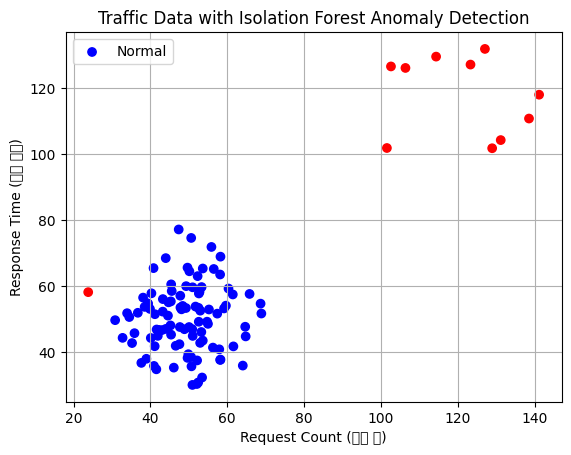

In [17]:
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"],
c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":
"red"}), # 색상 매핑
label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()

In [18]:
# 5. 결과 출력
# 전체 데이터프레임을 출력하여 정상/비정상 데이터 확인
print("전체 데이터와 이상 탐지 결과:")
print(traffic_df)

전체 데이터와 이상 탐지 결과:
     Request Count  Response Time  Anomaly Score  Anomaly
0        54.967142      48.617357              1   Normal
1        56.476885      65.230299              1   Normal
2        47.658466      47.658630              1   Normal
3        65.792128      57.674347              1   Normal
4        45.305256      55.425600              1   Normal
..             ...            ...            ...      ...
105     106.353026     126.112163             -1  Anomaly
106     138.499678     110.791051             -1  Anomaly
107     131.144524     104.267373             -1  Anomaly
108     102.584086     126.567732             -1  Anomaly
109     127.031756     131.871495             -1  Anomaly

[110 rows x 4 columns]


### DBSCAN

In [13]:
dbscan = DBSCAN(eps=15, min_samples=5)

In [14]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_data)

In [15]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x:
"Anomaly" if x == -1 else "Normal")

In [19]:
result_data = traffic_df[traffic_df['Anomaly']=='Anomaly']
result_data

,Request Count,Response Time,Cluster,Anomaly
102,117.974558,114.679592,-1,Anomaly
108,144.500267,116.899758,-1,Anomaly
109,118.779148,104.699097,-1,Anomaly


In [17]:
# 이상치 범위 확인
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~{max_response_time:.2f}")

비정상 데이터 범위:
- 요청 수 (Request Count): 117.97 ~ 144.50
- 응답 시간 (Response Time): 104.70 ~116.90


### 카드 이상 거래 데이터

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
 #라벨이 있지만, 비지도학습 실습용으로 라벨을 감추고 사용 
X = df.drop(columns=["Class"])  # 모델 입력용
y = df["Class"]                # 평가용 (숨겨둠)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_scaled 

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]], shape=(284807, 30))

In [91]:
# 정상 거래와 이상 거래 0.17
# 모델 생성
model = IsolationForest(n_estimators=100, contamination=0.17,random_state=42)

In [94]:
df['Anomaly Score'] =  model.fit_predict(X_scaled)

In [95]:
df['Anomaly Score']

0         1
1         1
2        -1
3         1
4         1
         ..
284802   -1
284803    1
284804    1
284805   -1
284806    1
Name: Anomaly Score, Length: 284807, dtype: int64

In [96]:
df['Anomaly'] = df['Anomaly Score'].apply(lambda x:"Normal" if x == 1 else "Anomaly")

In [97]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly Score,Anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,Anomaly
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1,Anomaly
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,Normal
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,Normal
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-1,Anomaly


In [98]:
y_true = y.map({0: "Normal", 1: "Anomaly"})

In [100]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = df["Anomaly"]

cm = confusion_matrix(
    y_true,
    y_pred,
    labels=["Normal", "Anomaly"]
)

print(cm)
print(classification_report(y_true, y_pred))

[[236346  47969]
 [    43    449]]
              precision    recall  f1-score   support

     Anomaly       0.01      0.91      0.02       492
      Normal       1.00      0.83      0.91    284315

    accuracy                           0.83    284807
   macro avg       0.50      0.87      0.46    284807
weighted avg       1.00      0.83      0.91    284807



### 딥러닝: tensorflow

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 

In [23]:
X, y = make_classification(n_samples=1000, 
n_features=20, # 특징(특성) 수
n_classes=2, # 클래스 수 (이진 분류)
random_state=42 # 랜덤 시드 고정 (결과 재현 가능성 보장)
)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 모델 생성

model = Sequential([
Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 은닉층: 입력 모양 정의
Dense(8, activation='relu'), #은닉층
Dense(1, activation='sigmoid') #출력층 (이진 분류 사용)
])


c:\py_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# 학습 방법 정의

model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)


In [29]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1 
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5047 - loss: 0.8849 - val_accuracy: 0.5375 - val_loss: 0.7955
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5344 - loss: 0.7643 - val_accuracy: 0.6000 - val_loss: 0.7083
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.6937 - val_accuracy: 0.6812 - val_loss: 0.6530
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6594 - loss: 0.6477 - val_accuracy: 0.7188 - val_loss: 0.6119
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.6110 - val_accuracy: 0.7563 - val_loss: 0.5751
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7437 - loss: 0.5783 - val_accuracy: 0.8125 - val_loss: 0.5354
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.5453 - val_accuracy: 0.8188 - val_loss: 0.4970
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.5129 - val_accuracy: 0.8438 - val_loss

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7900 - loss: 0.5084 
테스트 손실: 0.5084, 테스트 정확도: 0.7900


In [33]:
predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
예측 결과: [[0.4403116 ]
 [0.33643445]
 [0.4309795 ]
 [0.4779792 ]
 [0.50150967]]
